In [1]:
import pandas as pd
import math
# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
plt.rcParams["figure.figsize"] = (20,15)

<Figure size 3600x2160 with 0 Axes>

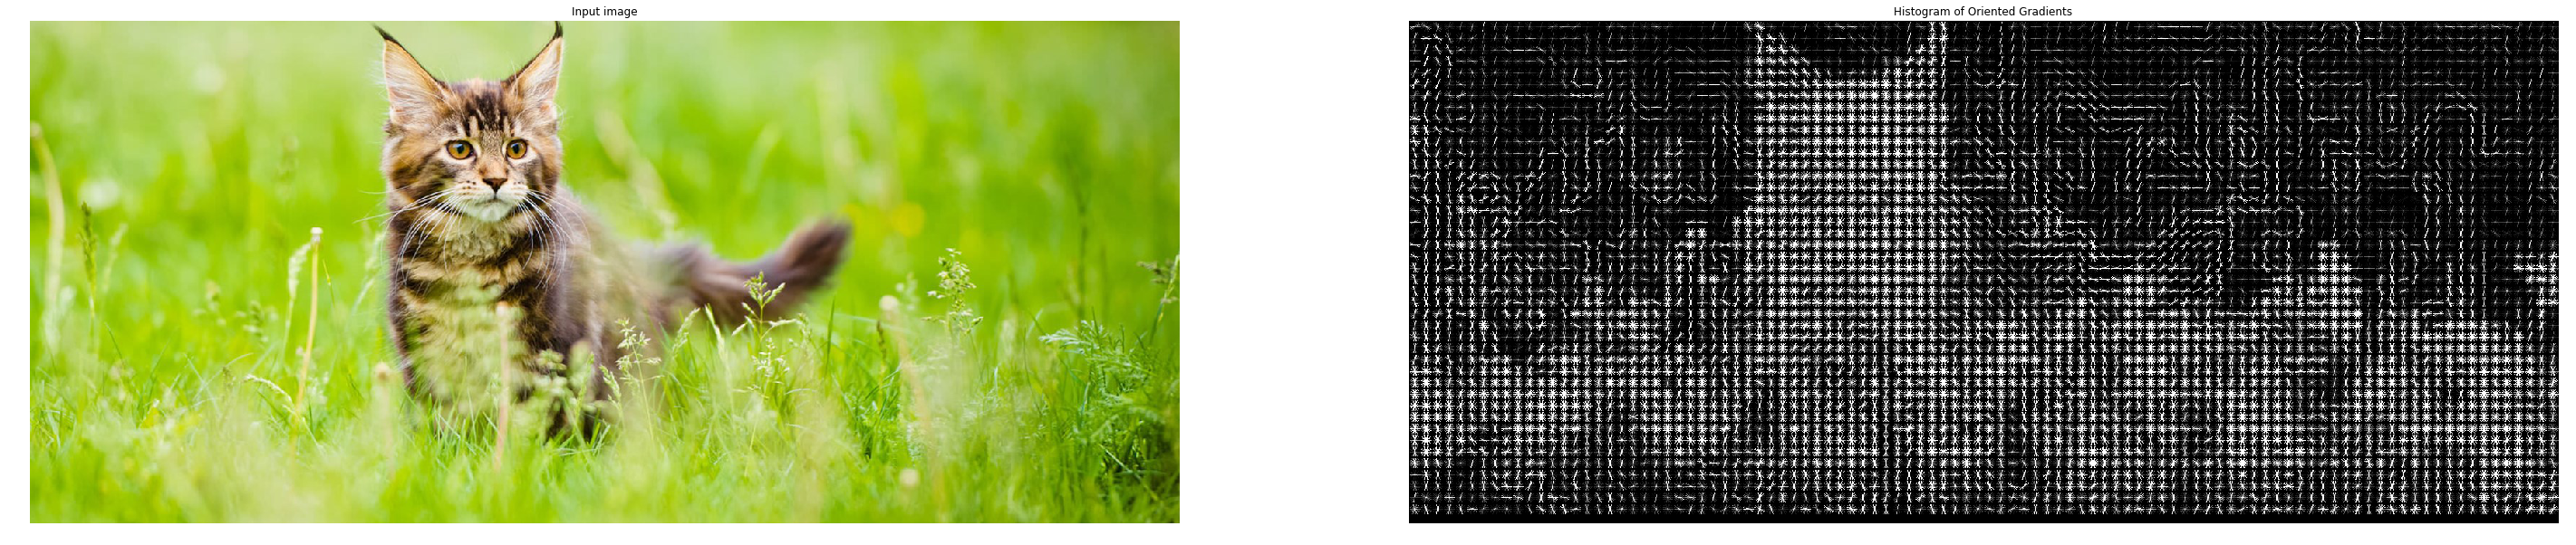

In [32]:
cat = plt.imread('/home/leonid/Рабочий стол/cat.jpg',)
plt.figure(figsize=(50,30))
fd, hog_image = hog(cat, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True,block_norm="L2")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 30), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(cat, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 2))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

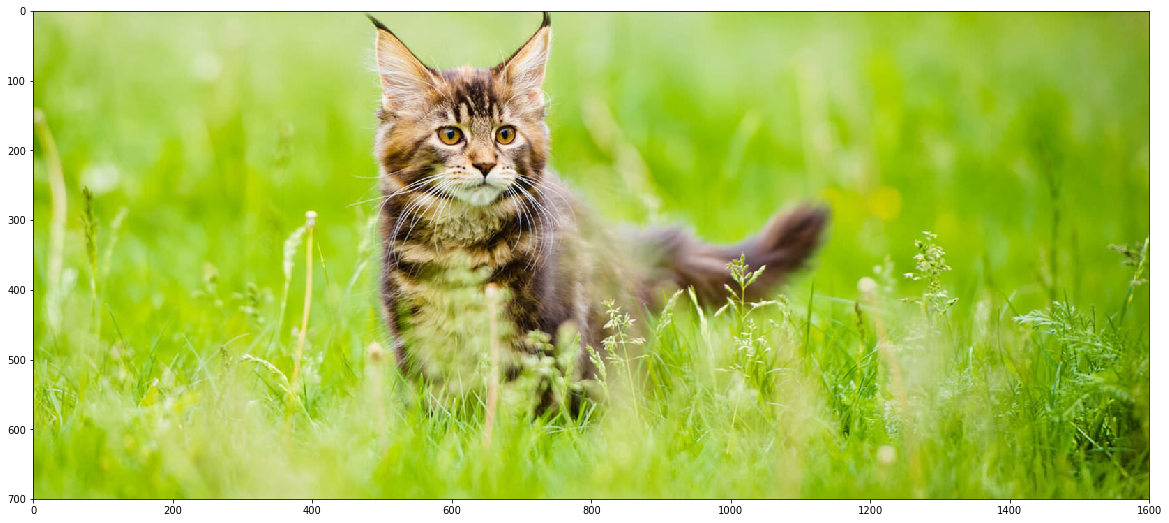

In [27]:

plt.figure(figsize=(20,15))
plt.imshow(cat)
plt.show()


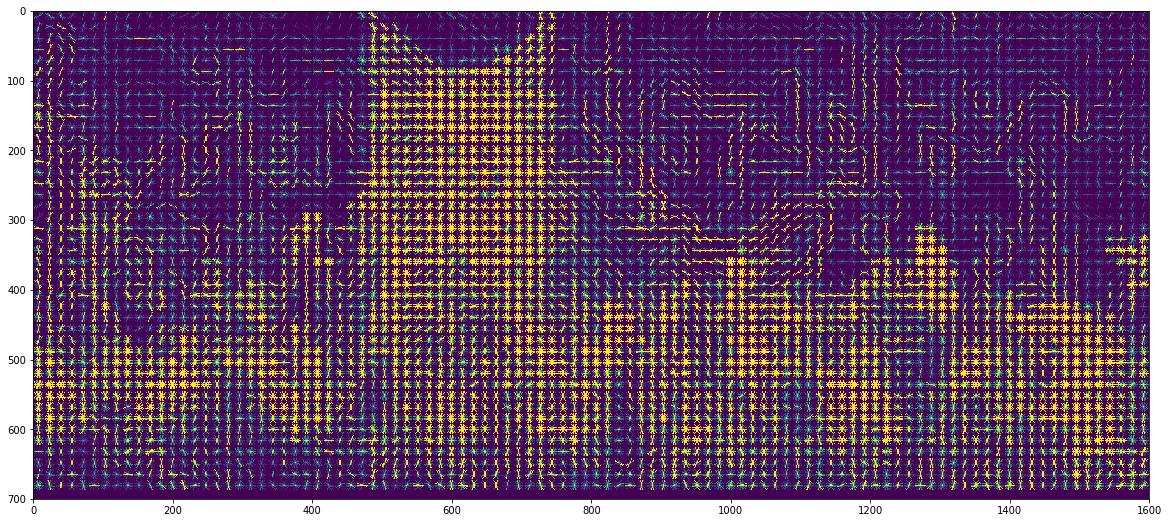

In [28]:
plt.imshow(hog_image_rescaled);

In [25]:
cat.shape

(700, 1600, 3)

In [49]:
fd = hog(sample, orientations=9, pixels_per_cell=(4, 16),
                    cells_per_block=(1, 1), visualize=False, multichannel=True,block_norm="L2")

(540,)

In [2]:
vectors = []
f = open('/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/pos.lst')
for line in f:
    
    
    path = '/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/'+line[6:-1]
    fd = hog(plt.imread(path)[10:138,15:79], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),visualize=False, multichannel=True,block_norm="L2")
    vectors.append(fd)
vectorspos =  np.asarray(vectors)
    
    

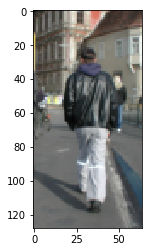

In [25]:
imtest = plt.imread('/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/pos/person_and_bike_151a.png')
imtest = imtest[10:138,15:79]
plt.imshow(imtest)


In [26]:
imtest.shape

(128, 64, 4)

In [17]:
imtest.shape

(160, 96, 4)

In [3]:
vectorspos =  np.asarray(vectors)

In [66]:
h, w, c = back.shape

In [4]:
HIEGHT = 128
WIDTH = 64

In [5]:
vectorsneg = []
f = open('/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/neg.lst')
for line in f:
    path = '/home/leonid/Загрузки/INRIAPerson/train_64x128_H96/'+line[6:-1]
    raw = plt.imread(path)
    h, w, c = raw.shape
    chuncks = []
    for i in range(h//HIEGHT):
        for j in range(w//WIDTH):
            chuncks.append(raw[i*HIEGHT:(i+1)*(HIEGHT),j*WIDTH:(j+1)*WIDTH])
    
    chuncks = np.asarray(chuncks)
    for i in range(chuncks.shape[0]):
        fd = hog(chuncks[i], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
             visualize=False, multichannel=True,block_norm="L2")
        vectorsneg.append(fd)
    
vectorsneg = np.asarray(vectorsneg)   

In [26]:
vectorsneg.shape

(18835, 3780)

In [27]:
vectorspos.shape

(2416, 3780)

In [12]:
np.save('posBackUp', vectorspos)
np.save('negBackUp', vectorsneg)

In [1]:
vectorpos = np.load('/home/leonid/science/HogTests/posBackUp.npy')
vectorneg = np.load('/home/leonid/science/HogTests/negBackUp.npy')

NameError: name 'np' is not defined

### Here goes classiffication

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [14]:

svm = SVC(kernel="linear",C=1)

In [18]:
vectors = np.concatenate((vectorspos,vectorsneg),axis=0)

In [28]:
y = np.concatenate((np.asarray([1]*2416),np.asarray([-1]*18835)),axis=0)
y[200]

1

In [21]:
vectorspos.shape

(2416, 3780)

In [29]:
X = pd.DataFrame(data = vectors)
y = pd.DataFrame(data = y)

In [32]:
svm.fit(X,y)

/home/leonid/jupyter/env/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
from sklearn.externals import joblib
joblib.dump(svm, 'SvmHog.joblib') 

['SvmHog.joblib']

In [4]:
from sklearn.externals import joblib
cmv = joblib.load('SvmHog.joblib')

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svm.predict(X_test))

0.9868217054263566

Тестирование

In [40]:
vectorsPosTest = []
f = open('/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/pos.lst')
for line in f:
    path = '/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/'+line[5:-1]
    fd = hog(plt.imread(path)[:128,0:64], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),visualize=False, multichannel=True,block_norm="L2")
    vectorsPosTest.append(fd)
vectorsPosTest = np.asanyarray(vectorsPosTest)

In [43]:
vectorsPosTest.shape

(1132, 3780)

In [41]:
vectorsNegTest = []
f = open('/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/neg.lst')
for line in f:
    path = '/home/leonid/Загрузки/INRIAPerson/test_64x128_H96/'+line[5:-1]
    raw = plt.imread(path)
    h, w, c = raw.shape
    chuncks = []
    for i in range(h//HIEGHT):
        for j in range(w//WIDTH):
            chuncks.append(raw[i*HIEGHT:(i+1)*(HIEGHT),j*WIDTH:(j+1)*WIDTH])
    
    chuncks = np.asarray(chuncks)
    for i in range(chuncks.shape[0]):
        fd = hog(chuncks[i], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
             visualize=False, multichannel=True,block_norm="L2")
        vectorsNegTest.append(fd)
    
vectorsNegTest = np.asarray(vectorsNegTest)   

In [42]:
vectorsNegTest.shape

(8648, 3780)

In [46]:
YTEST.shape

(9780,)

In [47]:
TEST.shape

(21251, 3780)

In [48]:
testvectors = np.concatenate((vectorsPosTest,vectorsNegTest),axis=0)

In [49]:
testvectors.shape

(9780, 3780)

In [59]:
from sklearn.metrics import accuracy_score
TEST = pd.DataFrame(data = testvectors)
YTEST = np.concatenate((np.asarray([1]*1132),np.asarray([-1]*8648)),axis=0)

In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_score(YTEST, svm.predict(TEST))

0.04875804967801288

0.9512419503219871

In [52]:
recall_score(YTEST, svm.predict(TEST))   

0.9134275618374559

## Построение DET кривой почти наугад

In [ ]:
C_s = np.logspace(-10, 0, 10)